# Changes in Flow rate

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle CLength = 10 rate = 1

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=1, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55B5A4080>]
Edges []
Node IDS [0]
Weights [[0, 1115, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55B5A4080>, <tangle.node object at 0x000001E55D372F30>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1115, 1], [1, 932, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55B5A4080>, <tangle.node object at 0x000001E55D372F30>, <tangle.node object at 0x000001E55B9389E0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1115, 1], [1, 932, 1], [2, 1823, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55B5A4080>, <tangle.node object at 0x000001E55D372F30>, <tangle.node object at 0x000001E55B9389E0>, <tangle.node object at 0x000001E55D548CB0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1115, 1], [1, 932, 1], [2, 1823, 1], [3, 765, 1]]
Finished 

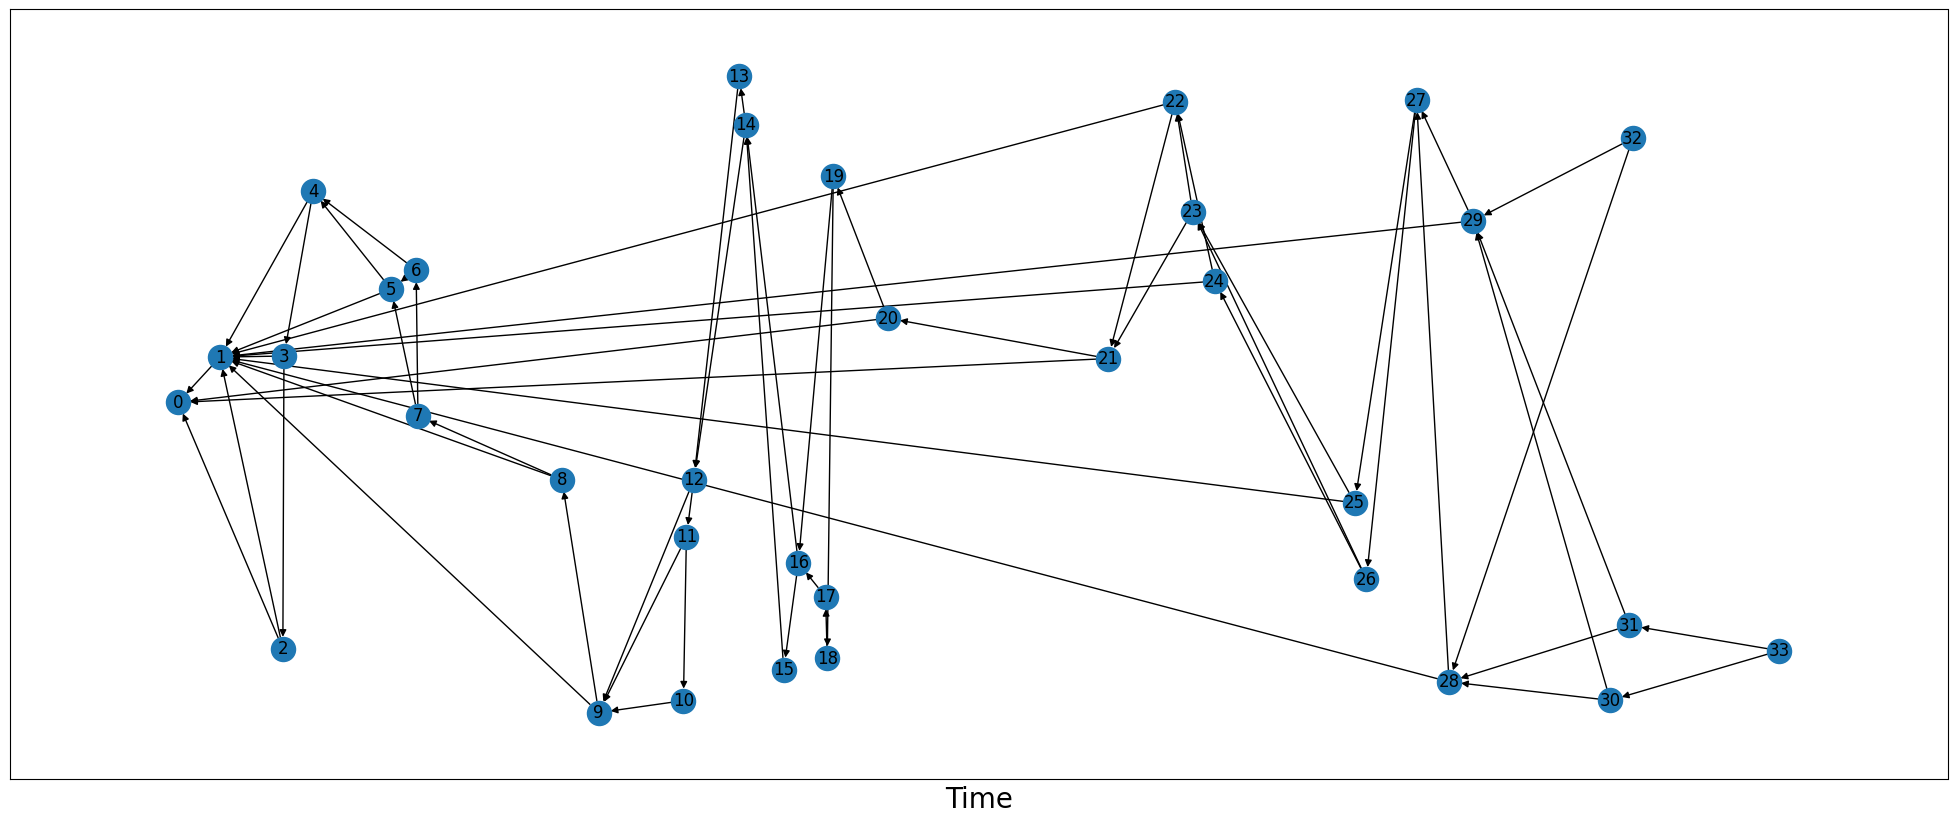

In [3]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 7, 9, 10, 11, 13, 13, 13, 16, 17, 18, 18, 18, 20, 20, 22, 22, 23, 25, 25, 25, 27] [1.0, 1.6381160924917966, 4.100417123979778, 4.143240834451571, 5.284434235263831, 8.333330312378756, 9.317970641532249, 9.389374629236052, 15.024380253734101, 16.46665256371359, 19.78233723261122, 19.899150791987353, 20.188361722094903, 21.962095385449466, 22.22470992336361, 23.710503903603342, 24.282149461498644, 25.348722452156238, 25.413047035330194, 25.64904786958566, 27.797675215356374, 36.40848545779713, 39.03868233975343, 39.7178439568315, 40.58603203509226, 46.06631606605983, 46.51993908864117, 48.48595541888898, 49.75707629060255, 50.6995451038324, 56.066445423320076, 56.818220659194786, 56.94798922701732, 62.689081535185196]
16.46665256371359


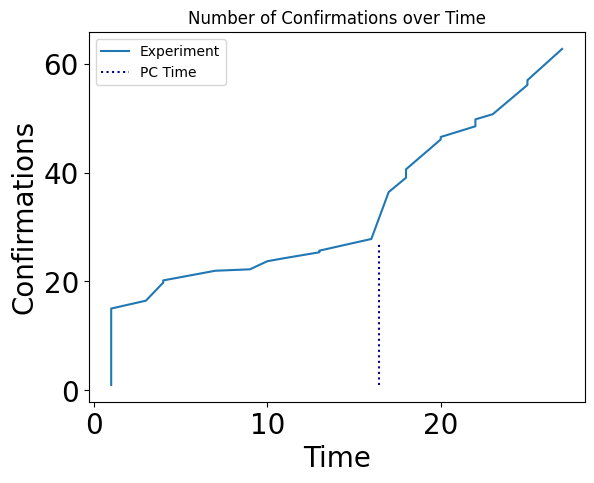

In [4]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [5]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 146], [2, 1.0, 86], [3, 1.0, 89], [4, 1.0101010101010102, 99], [5, 1.086021505376344, 93], [6, 1.1517857142857142, 112], [7, 1.4444444444444444, 99], [8, 2.109375, 128], [9, 2.3055555555555554, 108], [10, 3.5089285714285716, 112], [11, 4.489795918367347, 98], [12, 5.948453608247423, 97], [13, 6.068181818181818, 88], [14, 7.416666666666667, 84], [15, 7.7125, 80], [16, 7.8316831683168315, 101], [17, 9.5, 80], [18, 10.060240963855422, 83], [19, 11.708333333333334, 72], [20, 11.556818181818182, 88], [21, 12.293333333333333, 75], [22, 13.11864406779661, 59], [23, 14.963636363636363, 55], [24, 14.967213114754099, 61], [25, 15.703703703703704, 54], [26, 17.283333333333335, 60], [27, 17.22641509433962, 53], [28, 18.511111111111113, 45], [29, 18.674418604651162, 43], [30, 19.06, 50], [31, 19.54, 50], [32, 20.42222222222222, 45], [33, 20.729166666666668, 48], [34, 21.358490566037737, 53], [35, 21.95, 40], [36, 22.15, 60], [37, 22.80851063829787, 47], [38, 23.794871794871796, 39], [39, 

[[1, 1.0, 146], [2, 1.0, 86], [3, 1.0, 89], [4, 1.0101010101010102, 99], [5, 1.086021505376344, 93], [6, 1.1517857142857142, 112], [7, 1.4444444444444444, 99], [8, 2.109375, 128], [9, 2.3055555555555554, 108], [10, 3.5089285714285716, 112], [11, 4.489795918367347, 98], [12, 5.948453608247423, 97], [13, 6.068181818181818, 88], [14, 7.416666666666667, 84], [15, 7.7125, 80], [16, 7.8316831683168315, 101], [17, 9.5, 80], [18, 10.060240963855422, 83], [19, 11.708333333333334, 72], [20, 11.556818181818182, 88], [21, 12.293333333333333, 75], [22, 13.11864406779661, 59], [23, 14.963636363636363, 55], [24, 14.967213114754099, 61], [25, 15.703703703703704, 54], [26, 17.283333333333335, 60], [27, 17.22641509433962, 53], [28, 18.511111111111113, 45], [29, 18.674418604651162, 43], [30, 19.06, 50], [31, 19.54, 50], [32, 20.42222222222222, 45], [33, 20.729166666666668, 48], [34, 21.358490566037737, 53], [35, 21.95, 40], [36, 22.15, 60], [37, 22.80851063829787, 47], [38, 23.794871794871796, 39], [39, 

Text(0, 0.5, 'Confirmations')

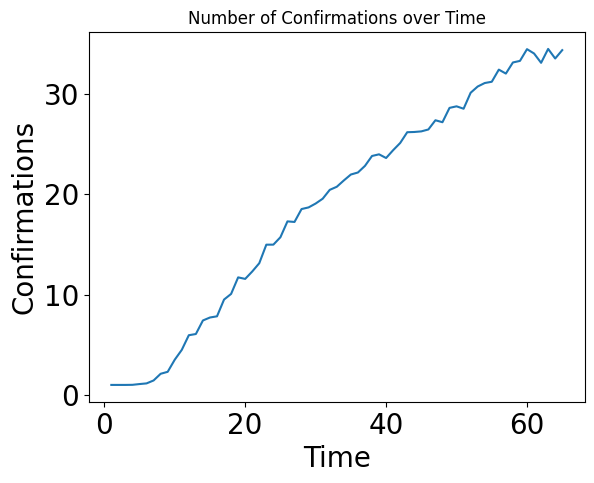

In [6]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [7]:
df.to_csv("pc-r1-c10 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [8]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=1, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(20)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55D8DFCE0>]
Edges []
Node IDS [0]
Weights [[0, 1092, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55D8DFCE0>, <tangle.node object at 0x000001E560321E20>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1092, 1], [1, 655, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55D8DFCE0>, <tangle.node object at 0x000001E560321E20>, <tangle.node object at 0x000001E560320470>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1092, 1], [1, 655, 1], [2, 1888, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55D8DFCE0>, <tangle.node object at 0x000001E560321E20>, <tangle.node object at 0x000001E560320470>, <tangle.node object at 0x000001E5602EF440>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1092, 1], [1, 655, 1], [2, 1888, 1], [3, 1830, 1]]
Finished

------------
Transaction number 4
Transaction Content 54
Node Weight 1
Confirmed Status False
------------
Transaction number 5
Transaction Content 33
Node Weight 1
Confirmed Status False
------------
Transaction number 6
Transaction Content 84
Node Weight 1
Confirmed Status False
------------
Transaction number 7
Transaction Content 80
Node Weight 1
Confirmed Status False
------------
Transaction number 8
Transaction Content 91
Node Weight 1
Confirmed Status False
[<Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>, <Transaction 16>, <Transaction 17>, <Transaction 18>, <Transaction 19>, <Transaction 20>, <Transaction 21>, <Transaction 22>, <Transaction 23>, <Transaction 24>, <Transaction 25>, <Transaction 26>, <Transaction 27>, <Transaction 28>, <Transaction 29>]
------------
Transaction number 30
Transaction Content 69
Node Weight 1
Confirmed Status False
31.813126691941264
------------
Transaction number 31
Tra

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 5, 5, 8, 10, 11, 12, 12, 12, 16, 16, 16, 16, 18, 19, 19, 21, 22, 23, 23, 27, 27, 28, 29, 31, 32, 33, 34, 35, 36, 36, 38, 39, 39, 39, 42, 43, 43, 43, 46] [1.0, 1.030037980790223, 1.2902967077579655, 1.7575343638579923, 2.2759544311702298, 3.165115705391568, 3.2081827599164447, 4.896998289200931, 7.113401124182503, 7.7994562931279, 9.734904802341559, 10.320923195658292, 11.144883109288994, 11.804502414861453, 16.348540123117466, 17.00649214993199, 17.927461822711482, 18.02013635666631, 18.059552375693574, 18.57655889239277, 20.05068199009418, 20.181194702613993, 20.572508426648856, 21.177645359007055, 21.322952722787143, 21.90168012533166, 22.16590326687694, 22.368374348689, 23.57307287678105, 23.983783657043713, 25.756482045040602, 27.840602100423595, 28.555828004518638, 30.010095766489012, 30.75012276158622, 32.53792427715543, 34.44962529888346, 36.22777455505554, 38.097486593143614, 39.37888761876264, 41.41041877932977, 42.25983531977874, 44.575876

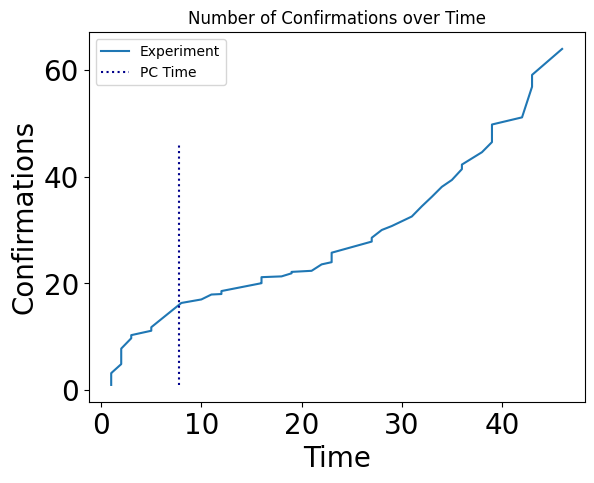

In [9]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [10]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 146], [2, 1.0, 110], [3, 1.0, 99], [4, 1.0666666666666667, 90], [5, 1.0505050505050506, 99], [6, 1.25, 104], [7, 1.6122448979591837, 98], [8, 1.9019607843137254, 102], [9, 2.623931623931624, 117], [10, 3.6222222222222222, 90], [11, 4.578947368421052, 95], [12, 5.130841121495327, 107], [13, 6.627659574468085, 94], [14, 7.395833333333333, 96], [15, 8.59375, 96], [16, 9.295652173913043, 115], [17, 10.666666666666666, 105], [18, 11.632075471698114, 106], [19, 13.372727272727273, 110], [20, 14.216981132075471, 106], [21, 14.83695652173913, 92], [22, 16.322222222222223, 90], [23, 16.56989247311828, 93], [24, 17.97979797979798, 99], [25, 18.80952380952381, 84], [26, 19.376470588235293, 85], [27, 20.195402298850574, 87], [28, 20.18888888888889, 90], [29, 22.1625, 80], [30, 22.388059701492537, 67], [31, 23.28, 75], [32, 23.84313725490196, 51], [33, 25.333333333333332, 66], [34, 26.06, 50], [35, 26.11111111111111, 63], [36, 27.2, 50], [37, 27.022727272727273, 44], [38, 28.0612244897959

[[1, 1.0, 146], [2, 1.0, 110], [3, 1.0, 99], [4, 1.0666666666666667, 90], [5, 1.0505050505050506, 99], [6, 1.25, 104], [7, 1.6122448979591837, 98], [8, 1.9019607843137254, 102], [9, 2.623931623931624, 117], [10, 3.6222222222222222, 90], [11, 4.578947368421052, 95], [12, 5.130841121495327, 107], [13, 6.627659574468085, 94], [14, 7.395833333333333, 96], [15, 8.59375, 96], [16, 9.295652173913043, 115], [17, 10.666666666666666, 105], [18, 11.632075471698114, 106], [19, 13.372727272727273, 110], [20, 14.216981132075471, 106], [21, 14.83695652173913, 92], [22, 16.322222222222223, 90], [23, 16.56989247311828, 93], [24, 17.97979797979798, 99], [25, 18.80952380952381, 84], [26, 19.376470588235293, 85], [27, 20.195402298850574, 87], [28, 20.18888888888889, 90], [29, 22.1625, 80], [30, 22.388059701492537, 67], [31, 23.28, 75], [32, 23.84313725490196, 51], [33, 25.333333333333332, 66], [34, 26.06, 50], [35, 26.11111111111111, 63], [36, 27.2, 50], [37, 27.022727272727273, 44], [38, 28.0612244897959

Text(0, 0.5, 'Confirmations')

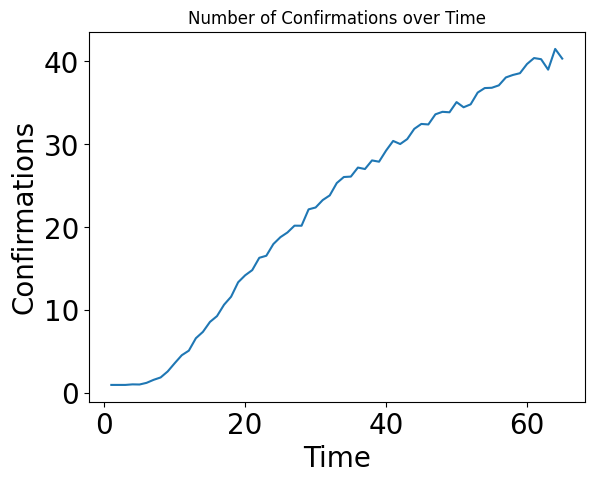

In [11]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [12]:
df.to_csv("pc-r1-c20 100")

## Clength = 5

In [13]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=1, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(5)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55F9256A0>]
Edges []
Node IDS [0]
Weights [[0, 1735, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55F9256A0>, <tangle.node object at 0x000001E55F994D70>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1735, 1], [1, 1279, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55F9256A0>, <tangle.node object at 0x000001E55F994D70>, <tangle.node object at 0x000001E55F995490>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1735, 1], [1, 1279, 1], [2, 1315, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001E55F9256A0>, <tangle.node object at 0x000001E55F994D70>, <tangle.node object at 0x000001E55F995490>, <tangle.node object at 0x000001E55FB826F0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1735, 1], [1, 1279, 1], [2, 1315, 1], [3, 968, 1]]
Finish

[1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 5, 6, 8, 8, 8, 9, 12, 13, 13, 15, 16, 17, 17, 17, 19, 20, 22, 23, 24, 24, 24, 26, 28, 29, 29, 31] [1.0, 2.5512237231104264, 4.997166892205584, 5.0749477710576345, 5.79006350588064, 5.931406092687384, 7.822108129517691, 8.942473782902741, 8.956958022189305, 9.153582796304097, 10.366639138754323, 11.494470822189184, 13.315258788396761, 15.110288671168805, 15.894177034718876, 19.476108225531497, 21.870297021674823, 25.358430992226882, 26.655076403838134, 27.688087495216422, 30.13523985474629, 31.591980909245667, 33.90130219235081, 34.602236432227855, 35.53274039539866, 36.42479483752967, 37.99305967728512, 39.47958605691007, 44.42198060081633, 44.45542262739783, 47.38141920101741, 48.16846776486866, 50.25665467027913, 54.71506207041741, 57.71345001064126, 62.372756546215925]
9.153582796304097
[[1, 1.0, 143], [2, 1.0, 97], [3, 1.0, 108], [4, 1.0, 92], [5, 1.064516129032258, 93], [6, 1.280701754385965, 114], [7, 1.7570093457943925, 107], [8, 1.8839285714285714

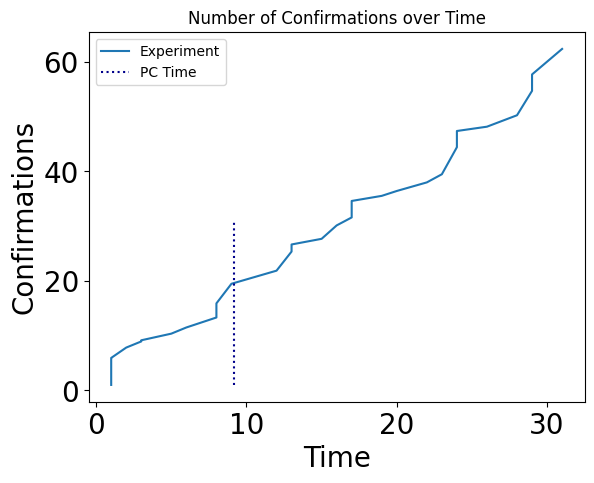

In [14]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 143], [2, 1.0, 97], [3, 1.0, 108], [4, 1.0, 92], [5, 1.064516129032258, 93], [6, 1.280701754385965, 114], [7, 1.7570093457943925, 107], [8, 1.8839285714285714, 112], [9, 2.3157894736842106, 95], [10, 3.967032967032967, 91], [11, 4.228260869565218, 92], [12, 4.37037037037037, 81], [13, 5.010309278350515, 97], [14, 5.652777777777778, 72], [15, 6.583333333333333, 72], [16, 7.527272727272727, 55], [17, 8.924528301886792, 53], [18, 9.833333333333334, 54], [19, 10.483870967741936, 62], [20, 10.313725490196079, 51], [21, 11.846153846153847, 52], [22, 12.083333333333334, 48], [23, 13.076923076923077, 52], [24, 13.25925925925926, 54], [25, 14.085106382978724, 47], [26, 14.568181818181818, 44], [27, 15.128205128205128, 39], [28, 15.625, 56], [29, 16.21818181818182, 55], [30, 16.102040816326532, 49], [31, 17.340425531914892, 47], [32, 17.46808510638298, 47], [33, 18.03921568627451, 51], [34, 18.72, 50], [35, 19.25, 52], [36, 19.46153846153846, 52], [37, 20.37735849056604, 53], [38, 20.5

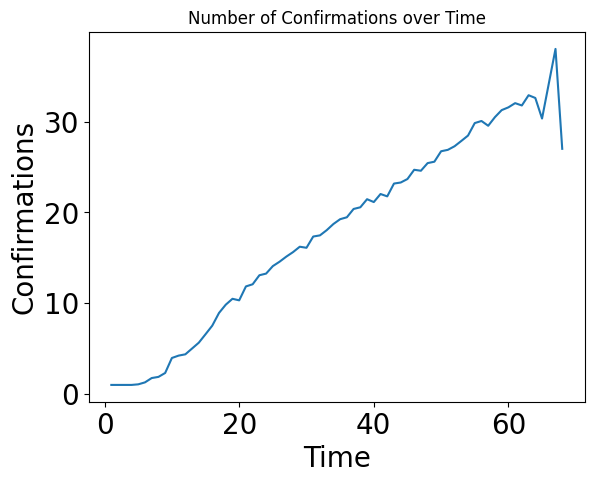

In [15]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r1-c5 100")